In [59]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [60]:
import numpy as np
import seaborn as sns
import pandas as pd
from dateutil.relativedelta import relativedelta
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [61]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [52]:
# create engine to hawaii.sqlite
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [62]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [63]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [64]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [65]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [66]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

# Exploratory Precipitation Analysis

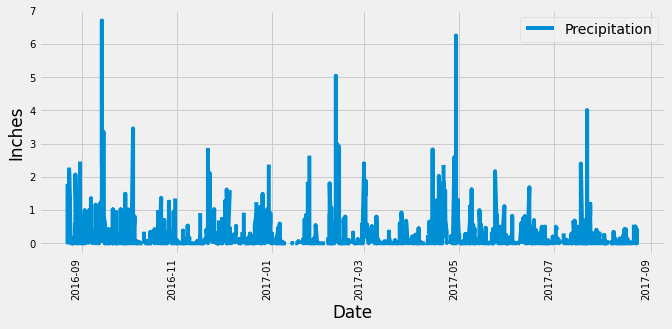

In [67]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# columns = inspector.get_columns('measurement')
# for column in columns:
#     print(column['name'], column['type'])

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date = dt.datetime.strptime(last_date[0], '%Y-%m-%d')
last_date = last_date.date()
#print(last_date)

year_ago = last_date - dt.timedelta(days=365)
#print(year_ago)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago)
# for precip in precipitation:
#     print(precip)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation, columns=['Date', 'Precipitation'])
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True, )
#df.head(10)

# Sort the dataframe by date

#df.sort_values(by='Date')
#df.head(10)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(10,5),
        use_index=True,
        fontsize=10,
        grid=True,
        rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()


In [69]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [70]:
# Design a query to calculate the total number stations in the dataset
stn_cnt = session.query(Station.id).count()
print(stn_cnt)

9


In [71]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stns = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
active_stns

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [72]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
highest_temp = session.query(Measurement.station, Measurement.tobs).\
filter(Measurement.station == 'USC00519281').order_by(Measurement.tobs.desc()).first()
print(highest_temp)

lowest_temp = session.query(Measurement.station, Measurement.tobs).\
filter(Measurement.station == 'USC00519281').order_by(Measurement.tobs).first()
print(lowest_temp)

avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()
print(avg_temp)

('USC00519281', 85.0)
('USC00519281', 54.0)
[('USC00519281', 71.66378066378067)]


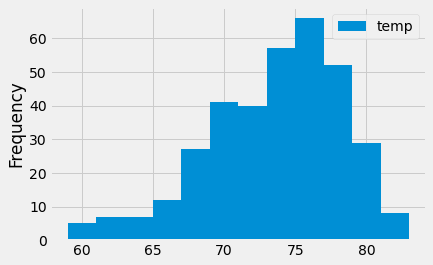

In [73]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date > year_ago).all()

temp_data_df = pd.DataFrame(temp_data, columns=['date', 'temp'])
temp_data_df.set_index('date', inplace=True, )
#temp_data_df.head()

temp_data_df.plot(kind='hist', bins=12);

# Close session

In [74]:
# Close Session
session.close()